# Covid-19 privacy literature search

Qiuyang Yin

04/27/2020

In [1]:
import numpy as np 
import pandas as pd 
import glob
import json

import matplotlib.pyplot as plt

In [2]:
root_path = 'CORD-19-research-challenge/'
metadata_path = f'{root_path}/metadata.csv'

In [3]:
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
display(meta_df.head())
meta_df.shape

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,zjufx4fo,b2897e1277f56641193a6db73825f707eed3e4c9,PMC,Sequence requirements for RNA strand transfer ...,10.1093/emboj/20.24.7220,PMC125340,11742998,unk,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc125340?pdf=re...
1,ymceytj3,e3d0d482ebd9a8ba81c254cc433f314142e72174,PMC,"Crystal structure of murine sCEACAM1a[1,4]: a ...",10.1093/emboj/21.9.2076,PMC125375,11980704,unk,CEACAM1 is a member of the carcinoembryonic an...,2002-05-01,"Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...",The EMBO Journal,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc125375?pdf=re...
2,wzj2glte,00b1d99e70f779eb4ede50059db469c65e8c1469,PMC,Synthesis of a novel hepatitis C virus protein...,10.1093/emboj/20.14.3840,PMC125543,11447125,no-cc,Hepatitis C virus (HCV) is an important human ...,2001-07-16,"Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...",EMBO J,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,2sfqsfm1,cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0,PMC,Structure of coronavirus main proteinase revea...,10.1093/emboj/cdf327,PMC126080,12093723,unk,The key enzyme in coronavirus polyprotein proc...,2002-07-01,"Anand, Kanchan; Palm, Gottfried J.; Mesters, J...",The EMBO Journal,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc126080?pdf=re...
4,i0zym7iq,dde02f11923815e6a16a31dd6298c46b109c5dfa,PMC,Discontinuous and non-discontinuous subgenomic...,10.1093/emboj/cdf635,PMC136939,12456663,unk,"Arteri-, corona-, toro- and roniviruses are ev...",2002-12-01,"van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...",The EMBO Journal,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc136939?pdf=re...


(57366, 18)

In [4]:
meta_df.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal',
       'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_pdf_parse',
       'has_pmc_xml_parse', 'full_text_file', 'url'],
      dtype='object')

In [5]:
selected_columns = ['title', 'abstract', 'publish_time', 'authors', 'journal','doi','url']
df_covid = meta_df[selected_columns]
df_covid.head()

,title,abstract,publish_time,authors,journal,doi,url
0,Sequence requirements for RNA strand transfer ...,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,10.1093/emboj/20.24.7220,http://europepmc.org/articles/pmc125340?pdf=re...
1,"Crystal structure of murine sCEACAM1a[1,4]: a ...",CEACAM1 is a member of the carcinoembryonic an...,2002-05-01,"Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...",The EMBO Journal,10.1093/emboj/21.9.2076,http://europepmc.org/articles/pmc125375?pdf=re...
2,Synthesis of a novel hepatitis C virus protein...,Hepatitis C virus (HCV) is an important human ...,2001-07-16,"Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...",EMBO J,10.1093/emboj/20.14.3840,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,Structure of coronavirus main proteinase revea...,The key enzyme in coronavirus polyprotein proc...,2002-07-01,"Anand, Kanchan; Palm, Gottfried J.; Mesters, J...",The EMBO Journal,10.1093/emboj/cdf327,http://europepmc.org/articles/pmc126080?pdf=re...
4,Discontinuous and non-discontinuous subgenomic...,"Arteri-, corona-, toro- and roniviruses are ev...",2002-12-01,"van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...",The EMBO Journal,10.1093/emboj/cdf635,http://europepmc.org/articles/pmc136939?pdf=re...


D:\ProgramData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ProgramData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


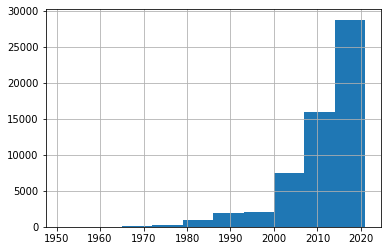

In [6]:
# publish year
df_covid['publish_time'] = pd.to_datetime(df_covid['publish_time'])
df_covid['publish_year'] = df_covid['publish_time'].dt.year
df_covid['publish_year'].hist()

In [27]:
# search sis
import functools
from IPython.core.display import display, HTML
from nltk import PorterStemmer

#tell the system how many sentences are needed
max_sentences=5

prefix = '[ -.,]('
sufix = ')[ -.,]'
tasks = [['Privacy', 'privacy', 'anonymity', 'anonymous']]
df = df_covid

for search_words in tasks:
    df_table = pd.DataFrame(columns = ["pub_date","authors","title","excerpt"])

    dfa=df[df['title'].str.contains(prefix + '|'.join(search_words) + sufix, case= True, na=False)]
    dfa['publish_year'].astype(int)
    dfa = dfa[dfa['publish_year'] == 2020]
    print(dfa.shape)

    df1=dfa.drop_duplicates()
    
    display(HTML('<h1>Task Topic: '+search_word+'</h1>'))

    for index, row in df1.iterrows():
        pub_sentence=''
        sentences_used=0
        if pd.isna(row['abstract']):
            continue
        sentences = row['abstract'].split('. ')
        for sentence in sentences:
            if sentences_used < max_sentences and len(sentence)<1000 and sentence!='':
                sentence=sentence.capitalize()
                if sentence[len(sentence)-1]!='.':
                    sentence=sentence+'.'
                sentences_used += 1
                pub_sentence=pub_sentence+'<br><br>'+sentence
        if pub_sentence!='':
            sentence=pub_sentence
            sentences_used=sentences_used+1
            authors=row["authors"].split(" ")
            link=row['doi']
            title=row["title"]
            linka='https://doi.org/'+str(link)
            linkb=title
            sentence='<p align="left">'+sentence+'</p>'
            final_link='<p align="left"><a href="{}">{}</a></p>'.format(linka,linkb)
            to_append = [row['publish_time'],authors[0]+' et al.',final_link,sentence]
            df_length = len(df_table)
            df_table.loc[df_length] = to_append
    df_table=HTML(df_table.to_html(escape=False,index=False))
    display(df_table)
print ("done")

(3, 8)


pub_date,authors,title,excerpt
2020-04-07,"Yasaka, et al.",Peer-to-Peer Contact Tracing: Development of a Privacy-Preserving Smartphone App,"Background: the novel coronavirus disease 2019 (covid-19) pandemic is an urgent public health crisis, with epidemiologic models predicting severe consequences, including high death rates, if the virus is permitted to run its course without any intervention or response.Contact tracing using smartphone technology is a powerful tool that may be employed to limit disease transmission during an epidemic or pandemic; yet, contact tracing apps present significant privacy concerns regarding the collection of personal data such as location.Objective: the aim of this study is to develop an effective contact tracing smartphone app that respects user privacy by not collecting location information or other personal data.Methods: we propose the use of an anonymized graph of interpersonal interactions to conduct a novel form of contact tracing and have developed a proof-of-concept smartphone app that implements this approach.Additionally, we developed a computer simulation model that demonstrates the impact of our proposal on epidemic or pandemic outbreak trajectories across multiple rates of adoption."
2020-04-06,"Qi, et al.",A network-based method with privacy-preserving for identifying influential providers in large healthcare service systems,"Abstract in data science, networks provide a useful abstraction of the structure of many complex systems, ranging from social systems and computer networks to biological networks and physical systems.Healthcare service systems are one of the main social systems that can also be understood using network-based approaches, for example, to identify and evaluate influential providers.In this paper, we propose a network-based method with privacy-preserving for identifying influential providers in large healthcare service systems.First, the provider-interacting network is constructed by employing publicly available information on locations and types of healthcare services of providers.Second, the ranking of nodes in the generated provider-interacting network is conducted in parallel on the basis of four nodal influence metrics."
2020-01-01,"WANG, et al.",The application of privacy protection and artificial intelligence technology in the information auxiliary system of the prevention and control of COVID-19,"Objective the outbreak of novel coronavirus raised many problems in the auxiliary information system of epidemic prevention and control, which including the need to prevent key data from being illegal modification, traceability, lack of decision support systems at different levels, barriers to cross regional cooperation and low automation of case diagnosis.Methods in this paper, artificial intelligence, security computing supporting privacy protection, block chain and other emerging technologies are introduced into the epidemic prevention and control auxiliary information system.Results this paper discusses how to utilize modern cryptography and block chain technology to establish a traceability system that could assure the security of epidemic information; design a distributed decision support system; solve the privacy-preserving problems of federated learning based on sgx technology, and present a group architecture to alleviate the performance cost of sgx.Conclusions the schemes above can help to achieve the security and traceability of epidemic information, also improve the automation and decision-making efficiency of the auxiliary information system for epidemic prevention and control."


done
